In [ ]:
#necessary imports

import numpy as np
import scipy
from scipy.special import gamma, factorial
import scipy.special as sc
import mpmath as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3D surface plots
import math
from cmath import phase
from scipy.ndimage.filters import gaussian_filter1d
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

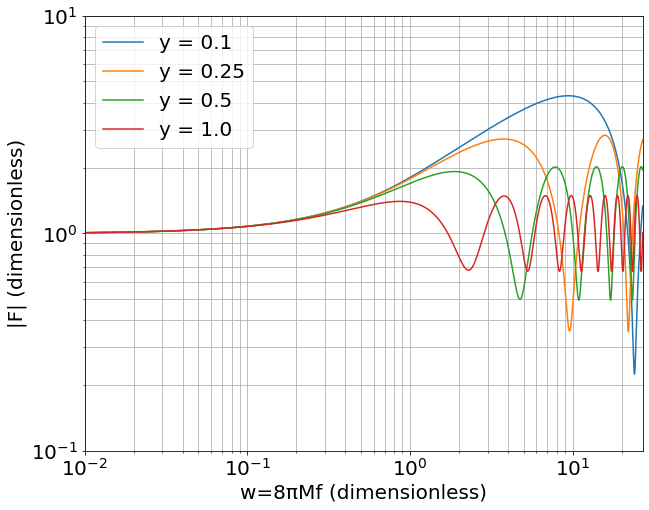

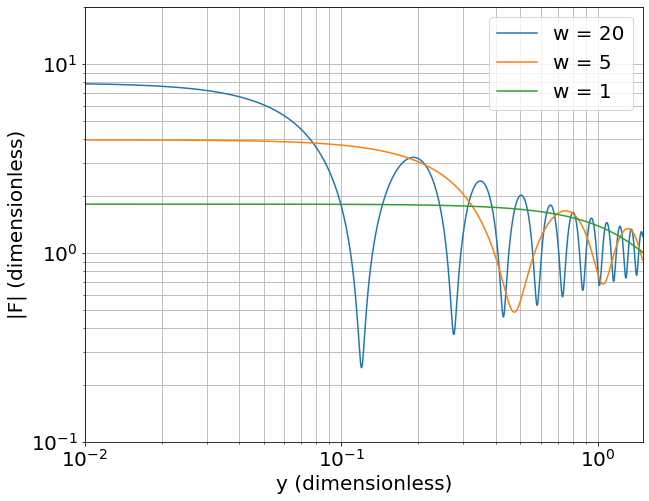

In [ ]:
"""
Reproducing plots from the following paper on point mass and SIS lens models
R. Takahashi and T. Nakamura, “Wave eﬀects in the gravitational lensing of gravitational waves from chirping binaries,” The Astrophysical Journal, vol. 595, pp. 1039–1051, 2003.
"""
#Point mass gravitational lens model
#magnitude of amplification factor plot
#legends on source position
y=[0.1,0.25,0.5,1.0]
plt.figure(figsize=(10,8))

#computing magnification factor magnitude for varying values of dimensionless frequencies
for j in range(0,4):
    n=10000
    w=np.linspace(0.01,27,n)
    func1=np.exp((np.pi*w)/4)
    z=1-((1j/2)*w)
    func2=abs(scipy.special.gamma(z))
    a=(1j/2)*w
    b=np.ones(n)
    c=(1j/2)*w*y[j]*y[j]
    func3=np.zeros(n)
    for i in range(0,n):
        func3[i]=abs(mp.hyp1f1(a[i],b[i],c[i]))
    F=func1*func2*func3
    plt.loglog(w, F) #plot
    plt.grid(True, which="both", ls="-")
plt.xlabel('w=8πMf (dimensionless)', fontsize=20)
plt.xlim(0.01,27)
plt.ylim(0.1,10)
plt.ylabel('|F| (dimensionless)', fontsize=20)
plt.legend(['y = 0.1', 'y = 0.25', 'y = 0.5', 'y = 1.0'], loc='upper left', fontsize=20)
plt.show()

#legends on w    
w=[20,5,1]
plt.figure(figsize=(10,8))

#computing magnification factor magnitude for varying values of y
for j in range(0,3):
    n=10000
    y=np.linspace(0.01,1.5,n)
    func1=np.exp((np.pi*w[j])/4)
    z=1-((1j/2)*w[j])
    func2=abs(scipy.special.gamma(z))
    for i in range(0,n):
        a[i]=(1j/2)*w[j]
    b=np.ones(n)
    c=(1j/2)*w[j]*y*y
    func3=np.zeros(n)
    for i in range(0,n):
        func3[i]=abs(mp.hyp1f1(a[i],b[i],c[i]))
    F=func1*func2*func3
    plt.loglog(y, F) #plot
    plt.grid(True, which="both", ls="-")

plt.xlabel('y (dimensionless)', fontsize=20)
plt.xlim(np.amin(y),np.amax(y))
plt.ylim(0.1,20)
plt.ylabel('|F| (dimensionless)', fontsize=20)
plt.legend(['w = 20', 'w = 5', 'w = 1'], loc='upper right', fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


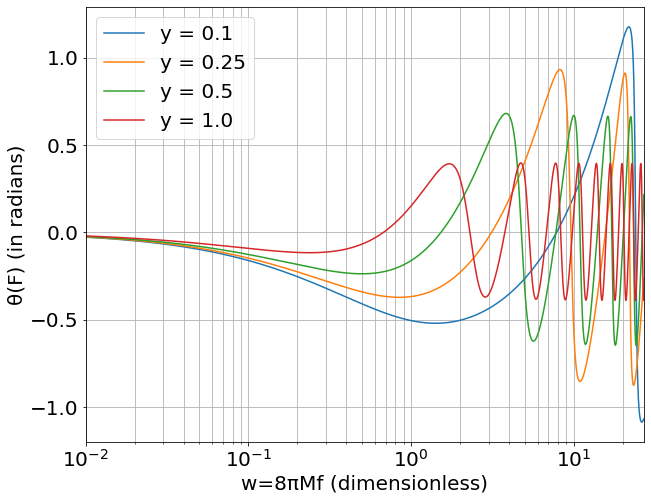

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


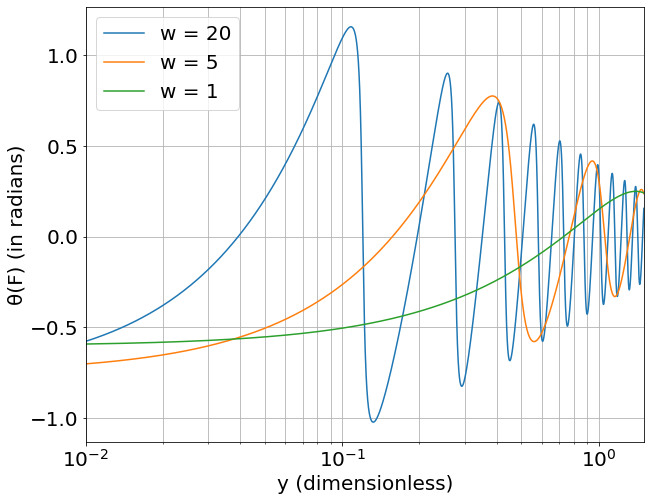

In [ ]:
#phase of amplification factor plot
y=[0.1,0.25,0.5,1.0]
plt.figure(figsize=(10,8))
xm=np.zeros(4)
for j in range(0,4):
    n=10000
    w=np.linspace(0.01,27,n)
    func1=np.exp((np.pi*w)/4)
    z=1-((1j/2)*w)
    func2=(scipy.special.gamma(z))
    a=(1j/2)*w
    b=np.ones(n)
    c=(1j/2)*w*y[j]*y[j]
    func3=np.zeros(n,dtype='complex64')
    for i in range(0,n):
        func3[i]=(mp.hyp1f1(a[i],b[i],c[i]))
    xm=0.5*(y[j]+np.sqrt(y[j]*y[j]+4.0))
    phim=0.5*((xm-y[j])**2)-np.log(xm)
    func4=np.zeros(n,dtype='complex64')
    for i in range(0,n):
        func4[i]=mp.exp(0.5j*w[i]*(np.log(0.5*w[i])-2.0*phim))
    F=abs(func1*func2*func3)
    Phi=-1j*np.log((func1*func2*func3*func4)/abs((func1*func2*func3*func4)))
    plt.grid(True, which="both", ls="-")
    plt.plot(w, Phi)
    
plt.xlabel('w=8πMf (dimensionless)', fontsize=20)
plt.xscale('log')
plt.xlim(np.amin(w),np.amax(w))
plt.ylabel('\u03B8(F) (in radians)', fontsize=20)
plt.legend(['y = 0.1', 'y = 0.25', 'y = 0.5', 'y = 1.0'], loc='upper left', fontsize=20)
plt.show()
    
w=[20,5,1]
plt.figure(figsize=(10,8))
for j in range(0,3):
    n=10000
    y=np.linspace(0.01,1.5,n)
    func1=np.exp((np.pi*w[j])/4)
    z=1-((1j/2)*w[j])
    func2=(scipy.special.gamma(z))
    for i in range(0,n):
        a[i]=(1j/2)*w[j]
    b=np.ones(n)
    c=(1j/2)*w[j]*y*y
    func3=np.zeros(n,dtype='complex64')
    for i in range(0,n):
        func3[i]=(mp.hyp1f1(a[i],b[i],c[i]))
    xm=0.5*(y+np.sqrt(y*y+4.0))
    phim=0.5*((xm-y)**2)-np.log(xm)
    func4=np.zeros(n,dtype='complex64')
    for i in range(0,n):
        func4[i]=mp.exp(0.5j*w[j]*(np.log(0.5*w[j])-2.0*phim[i]))
    F=abs(func1*func2*func3)
    Phi=-1j*np.log((func1*func2*func3*func4)/abs((func1*func2*func3*func4)))
    plt.grid(True, which="both", ls="-")
    plt.plot(y, Phi)

plt.xlabel('y (dimensionless)',fontsize=20)
plt.xscale('log')
plt.ylabel('\u03B8(F) (in radians)',fontsize=20)
plt.xlim(np.amin(y),np.amax(y))
plt.legend(['w = 20', 'w = 5', 'w = 1'], loc='upper left',fontsize=20)
plt.show()

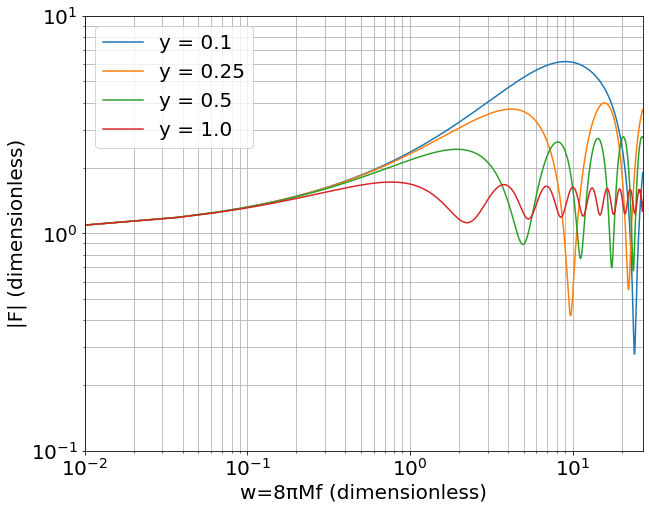

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import gamma, hyp1f1, factorial, exp, pi,log
from cmath import phase
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

#singular isothermal sphere (SIS) gravitational lens model

#defining the summation in F function
def integrand(n,w,y):
    return gamma(1+n/2.0)*hyp1f1(1+n/2.0,1.0,-0.5j*w*y*y)*((2*w*exp(1j*3*pi/2))**(n/2))/factorial(n)

#computing phase and magnitude of amplification factor for 4 values of y and varying values of w
N = 1000
wvec = np.linspace(0.01,27,N)
Fvec = np.zeros(N)
Ph1 = np.zeros(N, dtype='complex64')
Ph2 = np.zeros(N, dtype='complex64')
Ph3 = np.zeros(N, dtype='complex64')
Ph4 = np.zeros(N, dtype='complex64')
y=0.1
for i,w in enumerate(wvec):
    delta = 1.0
    F = 0.0
    n = 0
    while delta>1e-6:
        dF = integrand(n,w,y)
        F += dF
        delta = np.abs(dF)
        n += 1
    Fvec[i] = abs(exp(0.5j*w*y*y)*F)
    Ph1[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))

plt.figure(figsize=(10,8))
plt.loglog(wvec,Fvec)

y=0.25
for i,w in enumerate(wvec):
    delta = 1.0
    F = 0.0
    n = 0
    while delta>1e-6:
        dF = integrand(n,w,y)
        F += dF
        delta = np.abs(dF)
        n += 1
    Fvec[i] = abs(exp(0.5j*w*y*y)*F)
    Ph2[i]=-1j*log((exp(0.5j*w*((y*y)+(2*y)+1))*F)/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))

plt.loglog(wvec,Fvec)

y=0.5
for i,w in enumerate(wvec):
    delta = 1.0
    F = 0.0
    n = 0
    while delta>1e-6:
        dF = integrand(n,w,y)
        F += dF
        delta = np.abs(dF)
        n += 1
    Fvec[i] = abs(exp(0.5j*w*y*y)*F)
    Ph3[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))

plt.loglog(wvec,Fvec)

y=1.0
for i,w in enumerate(wvec):
    delta = 1.0
    F = 0.0
    n = 0
    while delta>1e-6:
        dF = integrand(n,w,y)
        F += dF
        delta = np.abs(dF)
        n += 1
    Fvec[i] = abs(exp(0.5j*w*y*y)*F)
    Ph4[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))

#magnitude plots
plt.loglog(wvec,Fvec)
plt.grid(True, which="both", ls="-")
plt.xlim(0.01,27)
plt.ylim(0.1,10)
plt.xlabel('w=8πMf (dimensionless)', fontsize=20)
plt.ylabel('|F| (dimensionless)', fontsize=20)
plt.legend(['y = 0.1', 'y = 0.25', 'y = 0.5', 'y = 1.0'], loc='upper left', fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


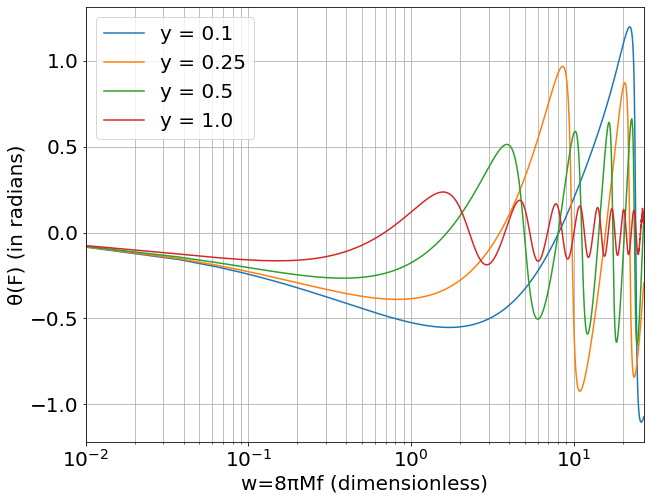

In [ ]:
#phase plots
plt.figure(figsize=(10,8))
plt.plot(wvec,Ph1)
plt.plot(wvec,Ph2)
plt.plot(wvec,Ph3)
plt.plot(wvec,Ph4)
plt.xscale('log')
plt.xlim(np.amin(wvec),np.amax(wvec))
plt.xlabel('w=8πMf (dimensionless)', fontsize=20)
plt.ylabel('\u03B8(F) (in radians)', fontsize=20)
plt.grid(True, which="both", ls="-")
plt.legend(['y = 0.1', 'y = 0.25', 'y = 0.5', 'y = 1.0'], loc='upper left', fontsize=20)
plt.show()

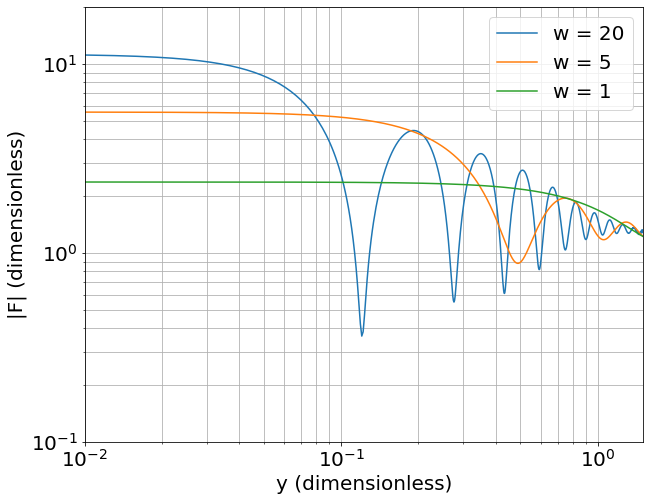

In [ ]:
#phase and magnitude values computation for 4 values of w and varying values of y

a=[20,5,1]
yvec=np.linspace(0.01,1.5,N)
plt.figure(figsize=(10,8))
for j in range(0,3):
    w=a[j]
    for i,y in enumerate(yvec):
        delta = 1.0
        F = 0.0
        n = 0
        while delta>1e-3:
            dF = integrand(n,w,y)
            F += dF
            delta = np.abs(dF)
            n += 1
        Fvec[i] = abs(exp(0.5j*w*y*y)*F)
        if(j==0):
            Ph1[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))
        elif(j==1):
            Ph2[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))
        elif(j==2):
            Ph3[i]=-1j*log(exp(0.5j*w*((y*y)+(2*y)+1))*F/abs((exp(0.5j*w*((y*y)+(2*y)+1))*F)))
    plt.loglog(yvec,Fvec)

#magnitude plot    
plt.grid(True, which="both", ls="-")
plt.xlabel('y (dimensionless)', fontsize=20)
plt.xlim(np.amin(yvec),np.amax(yvec))
plt.ylim(0.1,20)
plt.ylabel('|F| (dimensionless)', fontsize=20)
plt.legend(['w = 20', 'w = 5', 'w = 1'], loc='upper right', fontsize=20)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


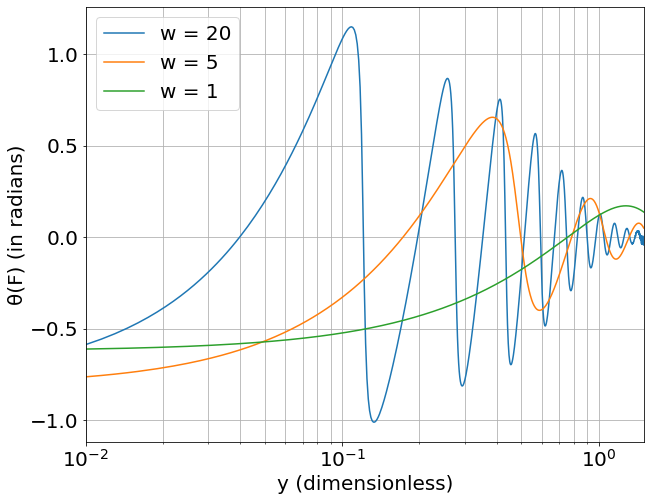

In [ ]:
#phase plot
plt.figure(figsize=(10,8))
plt.plot(yvec,Ph1)
plt.plot(yvec,Ph2)
plt.plot(yvec,Ph3)
plt.xscale('log')
plt.xlim(np.amin(yvec),np.amax(yvec))
plt.xlabel('y (dimensionless)', fontsize=20)
plt.ylabel('\u03B8(F) (in radians)', fontsize=20)
plt.grid(True, which="both", ls="-")
plt.legend(['w = 20', 'w = 5', 'w = 1'], loc='upper left', fontsize=20)
plt.show()